In [1]:
train_file_path= r'E:\FSDS Training\End-to-End-ML_Project\price_prediction\artifact\data_ingestion\2022-09-18-13-03-50\ingested_data\train\housing.csv'

In [2]:
import pandas as pd

In [5]:
df=pd.read_csv(train_file_path)

In [6]:
df.shape

(16512, 10)

In [7]:
df['median_house_value']

0         72100.0
1        279600.0
2         82700.0
3        112500.0
4        238300.0
           ...   
16507    268500.0
16508     90400.0
16509    140400.0
16510    258100.0
16511     62700.0
Name: median_house_value, Length: 16512, dtype: float64

In [8]:
x,y=df.drop(columns=['median_house_value'],axis=1),df[['median_house_value']]

In [36]:
x.shape

(16512, 9)

In [9]:
x.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [10]:
from sklearn.impute import SimpleImputer

In [11]:
numerical_column= x.drop(columns=['ocean_proximity'],axis=1)

In [12]:
simple_imputer= SimpleImputer(strategy='median')

In [13]:
simple_imputer.fit_transform(numerical_column)

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

In [14]:
df=simple_imputer.transform(numerical_column)

In [15]:
df

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

In [16]:
simple_imputer.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

In [17]:
simple_imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [18]:
x.ocean_proximity.value_counts()

<1H OCEAN     7277
INLAND        5262
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: ocean_proximity, dtype: int64

In [19]:
simple_imputer=SimpleImputer(strategy='most_frequent')

In [20]:
from sklearn.base import BaseEstimator, TransformerMixin

In [21]:
class Test(BaseEstimator,TransformerMixin):
    
    def __init__(self,strategy="median"):
        self.strategy=strategy

    def fit(self,x):
        self.features_=x.columns
        self.statistic_=[]
        for column in x.columns:
            self.statistic_.append(x[column].median())
        return self


    def transform(self,x:pd.DataFrame):
        for idx,column in enumerate(x.columns):
            x[column].fillna(self.statistic_[idx]) 
        return x

In [22]:
response =Test().fit(numerical_column)

In [23]:
response.statistic_

[-118.51, 34.26, 29.0, 2119.0, 433.0, 1164.0, 408.0, 3.54155]

In [24]:
for idx,column in enumerate(x.columns):
    print(idx,column)

0 longitude
1 latitude
2 housing_median_age
3 total_rooms
4 total_bedrooms
5 population
6 households
7 median_income
8 ocean_proximity


In [25]:
import numpy as np

In [26]:
x.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [37]:
COLUMN_TOTAL_ROOMS = "total_rooms"
COLUMN_POPULATION = "population"
COLUMN_HOUSEHOLDS = "households"
COLUMN_TOTAL_BEDROOM = "total_bedrooms"

class FeatureGenerator(BaseEstimator, TransformerMixin):

    def __init__(self, add_bedrooms_per_room=True,
                 total_rooms_ix=3,
                 population_ix=5,
                 households_ix=6,
                 total_bedrooms_ix=4, columns=None):
        """
        FeatureGenerator Initialization
        add_bedrooms_per_room: bool
        total_rooms_ix: int index number of total rooms columns
        population_ix: int index number of total population columns
        households_ix: int index number of  households columns
        total_bedrooms_ix: int index number of bedrooms columns
        """
        try:
            self.columns = columns
            if self.columns is not None:
                total_rooms_ix = self.columns.index(COLUMN_TOTAL_ROOMS)
                population_ix = self.columns.index(COLUMN_POPULATION)
                households_ix = self.columns.index(COLUMN_HOUSEHOLDS)
                total_bedrooms_ix = self.columns.index(COLUMN_TOTAL_BEDROOM)

            self.add_bedrooms_per_room = add_bedrooms_per_room
            self.total_rooms_ix = total_rooms_ix
            self.population_ix = population_ix
            self.households_ix = households_ix
            self.total_bedrooms_ix = total_bedrooms_ix
        except Exception as e:
            raise e

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        try:
            room_per_household = X[:, self.total_rooms_ix] / \
                                 X[:, self.households_ix]
            population_per_household = X[:, self.population_ix] / \
                                       X[:, self.households_ix]
            if self.add_bedrooms_per_room:
                bedrooms_per_room = X[:, self.total_bedrooms_ix] / \
                                    X[:, self.total_rooms_ix]
                generated_feature = np.c_[
                    X, room_per_household, population_per_household, bedrooms_per_room]
            else:
                generated_feature = np.c_[
                    X, room_per_household, population_per_household]

            return generated_feature
        except Exception as e:
            raise e

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
num_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy="median")),
    ('feature_genrator',FeatureGenerator()),
    ('scaling',StandardScaler())
])

In [41]:
#for categorical column
from sklearn.preprocessing import OneHotEncoder

In [42]:
cat_pipeline = Pipeline(steps=[
     ('imputer',SimpleImputer(strategy="most_frequent")),
      ('oneHotEncoder',OneHotEncoder()),
       ('scaling',StandardScaler(with_mean=False))
])

In [49]:
df=pd.read_csv(train_file_path)

In [50]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [51]:
num_column_name=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
        ]

cat_column_name=['ocean_proximity']

In [52]:
preprocessing  =ColumnTransformer([
    ('num_pipeline',num_pipeline,num_column_name),
    ('cat_pipeline',cat_pipeline,cat_column_name)]
)

In [65]:
train_df=preprocessing.fit_transform(df)

In [55]:
test_df=pd.read_csv(train_file_path)

In [56]:
preprocessing.transform(test_df)

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  2.9869105 ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [57]:
import dill

In [58]:
with open("pickle.pkl",'wb') as pro_file:
    dill.dump(preprocessing,pro_file)

In [60]:
with open("pickle.pkl",'rb') as file_obj:
    pickle_obj=dill.load(file_obj)

In [61]:
pickle_obj.transform(test_df)

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  2.9869105 ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [62]:
from sklearn.linear_model import LinearRegression

In [75]:
x=train_df

In [76]:
y=np.array(df.median_house_value)

In [77]:
lr=LinearRegression()

In [78]:
lr.fit(x,y)

LinearRegression()

In [79]:
y_pred= lr.predict(x)

In [80]:
import matplotlib.pyplot as plt

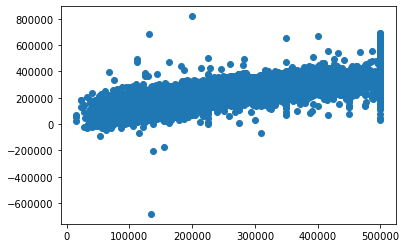

In [82]:
plt.plot(y,y_pred,'o')

In [83]:
from sklearn.metrics import r2_score

In [84]:
r2_score(y,y_pred)

0.6481553634675169